In [102]:
aum = 1000000
allocs = [0.4, 0.2, 0.4]
symbols = ['SPY', 'GOOG', 'IBM']
dates = pd.date_range('2019-01-01', '2019-07-12')

In [108]:
class Portfel():
    '''Класс портфель выполняет позволяет составить портфель из выбранных бумаг и получить краткие статистики'''
    def __init__(self, symbols, dates, allocs, aum):
        self.dates = dates
        self.symbols = symbols
        self.allocs = allocs
        self.aum = aum
        self.values = self.get_portfel_values
        self.returns = self.get_portfel_returns
        self.all_shares = self.get_data
        
    def help(self):
        methods = [
            'dates',
            'symbols',
            'allocs',
            'aum',
            'returns',
            'values',
            'returns',
            'all_shares',
            'get_portfel_values',
            'returns_hist()']
        return methods
    
    def get_data(self, base='data/'):
        '''
        Получает цену акций (Adj Close) для данного symbol из CSV файла
        '''
        # Создаем пустой датафрейм и удостоверимся, что SPY будет на первом месте
        df = pd.DataFrame(index=self.dates)
        if 'SPY' not in self.symbols:
             self.symbols.insert(0, 'SPY')
    
        for symbol in self.symbols:
            df_temp = pd.read_csv(base + symbol + '.csv', index_col='Date', usecols=['Date', 'Adj Close'], parse_dates=True, na_values=['nan']) 
            df_temp = df_temp.rename(columns={'Adj Close': symbol})
            df = df.join(df_temp, how='inner')
        return df
        
    def get_portfel_values(self):
        '''Подсчитываем стоимость портфеля в каждый период времени'''
        df_normed = self.get_data().copy()
        df_normed = df_normed / df_normed.iloc[0, :]
        alloced = df_normed * allocs * aum
        port_values = alloced.sum(axis=1)
        return port_values
    
    def get_portfel_returns(self, accumulated=False, average=False, std=False):
        '''Подсчитываем изменение стоимости портфеля во времени'''
        df_returns = self.get_portfel_values()
        df_returns =  (df_returns / df_returns.shift(1)) - 1
        df_returns[0] = 0
        if accumulated == True:
            return df_returns.sum()
        elif average == True:
            return df_returns.mean()
        elif std == True:
            return df_returns.std()
        else:
            return df_returns
        
    def returns_hist(self, bins=10, lines=True):
        df = self.returns()
        df.hist(bins=bins)
        mean = df.mean()
        std = df.std()
        
        # Чертим вертикальную белую черту, отображающую среднее значение
        # Чертим вертикальные красные линии, отображающие отклонения
        if lines == True:
            plt.axvline(mean, color='w', linestyle='dashed', linewidth=2, label='Mean')
            plt.axvline(std, color='r', linestyle='dashed', linewidth=2, label='STD')
            plt.axvline(-std, color='r', linestyle='dashed', linewidth=2)
        plt.title('Portfel Returns')
        plt.xlabel('Return')
        plt.ylabel('# of days')
        plt.legend()
        plt.show()
        
    def sharpe(self, rr=0, adj='daily'):
        numenator = (self.returns - rr).mean()
        denumenator = (self.returns - rr).std()
        if adj='daily':
            return np.sqrt(252) * numenator / denumenator
        if adj='weekly':
            return np.sqrt(52) * numenator / denumenator
        if adj='monthly':
            return np.sqrt(12) * numenator / denumenator
    

SyntaxError: invalid syntax (<ipython-input-108-48d8ce5f2866>, line 84)

In [77]:
class Stocks():
    def __init__(self, symbols, dates):
        self.dates = dates
        self.symbols = symbols
        self.prices = self.get_data
        self.plot = self.get_plot_df
        self.returns = self.get_daily_returns
        
    def get_data(self, base='data/'):
        '''
        Получает цену акций (Adj Close) для данного symbol из CSV файла
        '''
        # Создаем пустой датафрейм и удостоверимся, что SPY будет на первом месте
        df = pd.DataFrame(index=self.dates)
        if 'SPY' not in self.symbols:
            self.symbols.insert(0, 'SPY')
    
        for symbol in self.symbols:
            df_temp = pd.read_csv(base + symbol + '.csv', index_col='Date', usecols=['Date', 'Adj Close'], parse_dates=True, na_values=['nan']) 
            df_temp = df_temp.rename(columns={'Adj Close': symbol})
            df = df.join(df_temp, how='inner')
        return df
        
    def get_plot_df(self, title='Цены на акции', relative=False):
        '''Рисует графики цен всего DataFrame'''
        if relative == False:
            df = self.prices()
            df.plot(title=title, fontsize=11)
            plt.xlabel('Дата')
            plt.ylabel('Цены')
        if relative == True:
            df = self.prices() / self.prices().iloc[0, :]
            df.plot(title='Изменение цен на акции')
        plt.show()
        
    def plot_selected(self, columns, start_index, end_index, relative=False):
        '''Рисует графики цен указанных столбцов'''
        df = self.prices().loc[start_index:end_index, columns]
        if relative == False:
            df.plot(title='Цены на акции', fontsize=11)
            plt.xlabel('Дата')
            plt.ylabel('Цены')
            plt.show()
        elif relative == True:
            df = df / df.iloc[0, :]
            df.plot(title='Изменение цен на акции')
            plt.show()
            
    def get_rolling_mean(self, symbol, window=20):
        return self.prices()[symbol].rolling(window).mean()
    
    def plot_rolling_mean(self, symbol, window, add=None):
        df = self.get_rolling_mean(symbol, window=window)
        df.plot(title='Скользящее среднее')
        if add == 'bolinger':
            mean = df.rolling(window).mean()
            std = df.rolling(window).std()
            lower_bond = mean - 2 * std
            upper_bond = mean + 2 * std
        plt.plot(lower_bond, color='r', label='lower bond')
        plt.plot(upper_bond, color='r', label='upper bond')
        plt.plot(mean, color='g', label='average')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend()
        plt.show()
        
    def get_double_hist(self, symbols, bins=20, alpha=0.7):
        '''Создаем две диаграммы для двух бумаг'''
        df = self.returns()
        for symbol in symbols:
            df[symbol].hist(bins=bins, label=symbol, alpha=alpha)
        plt.legend()
    
    def get_daily_returns(self):
        daily_returns = self.prices()
        daily_returns[1:] = (daily_returns / daily_returns.shift(1)) - 1
        daily_returns.iloc[0, :] = 0
        return daily_returns
    
    def help(self):
        methods = [
            'dates',
            'symbols',
            'prices',
            'plot',
            'returns',
            'plot_selected(symbols, start, end)',
            'get_rolling_mean(symbol, window)',
            'get_daily_returns',
            'get_double_hist(symbols)'
        ]
        return methods
    

#### Статистики портфеля

Sharp Ratio может быть вычислен по седующей формуле:
$SR = \frac{R_p - R_f}{\sigma_p}$, где

$ R_p - $ returns портфеля

$ R_f - $ returns risk-free

$ \sigma_p - $ стандартное отклонение портфеля

Мы будем использовать другую формулировку.

Что брать в качестве risk-free rate?

1. Libor (London Interbank Offer Rate)
2. 3-month Treasury bill
3. 0%


Как превратить годовую ставку risk free в ежедневную?

daily_rf = 252rt(1.0 + 0.1) - 1

SR - annual measure

$SR_{annualized} = K * SR$

K - это корень из #samples per year, т.е из 252, если ежедневная основа, из 52, если недельная, из 12, если месячная

In [1]:
(0.001-0.0002)/0.001

0.8

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def symbol_to_path(symbol, base_dir="data"):
    return  base_dir + "/{}.csv".format(str(symbol))

def get_data(symbols, dates):
    '''
    Получает цену акций (Adj Close) для данного symbol из CSV файла
    '''
    # Создаем пустой датафрейм и удостоверимся, что SPY будет на первом месте
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:
        symbols.insert(0, 'SPY')
    
    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date', usecols=['Date', 'Adj Close'], parse_dates=True, na_values=['nan']) 
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        df = df.join(df_temp, how='inner')
    return df

def plot_df(df, title='Цены на акции'):
    '''Рисует графики цен всего DataFrame'''
    df.plot(title=title, fontsize=11)
    plt.xlabel('Дата')
    plt.ylabel('Цены')
    plt.show()

def plot_selected(df, columns, start_index, end_index):
    '''Рисует графики цен указанных столбцов'''
    df.loc[start_index:end_index, columns].plot(title='Цены на акции', fontsize=11)
    plt.xlabel('Дата')
    plt.ylabel('Цены')
    plt.show()    
    
def normalize_data(df):
    '''Нормализует весь датафрэйм для отображения изменения цен.'''
    df = df / df.iloc[0, :]
    return df

def get_rolling_mean(df, window):
    return df.rolling(window).mean()

def get_rolling_std(df, window):
    return df.rolling(window).std()

def get_Boolinger_bonds(rm, rstd):
    upper_bond = rm + 2 * rstd
    lower_bond = rm - 2 * rstd
    return lower_bond, upper_bond

def get_daily_return(df):
    daily_returns = df.copy()
    daily_returns[1:] = (df / df.shift(1)) - 1
    daily_returns.iloc[0, :] = 0
    return daily_returns

def get_hist(df, bins=20):
    df.hist(bins=bins)
    mean = df.mean()
    std = df.std()
    
    # Чертим вертикальную белую черту, отображающую среднее значение
    # Чертим вертикальные красные линии, отображающие отклонения
    plt.axvline(mean, color='w', linestyle='dashed', linewidth=2)
    plt.axvline(std, color='r', linestyle='dashed', linewidth=2)
    plt.axvline(-std, color='r', linestyle='dashed', linewidth=2)
    plt.show()
    
def get_double_hist(df, bins=20, alpha=0.7):
    '''Создаем две диаграммы для двух бумаг'''
    for symbol in df.keys():
        df[symbol].hist(bins=bins, label=symbol, alpha=alpha)
    plt.legend()

def get_portf_values(df, allocs, aum):
    '''Подсчитываем стоимость портфеля в каждый период времени'''
    df_normed = df.copy()
    df_normed = df_normed / df_normed.iloc[0, :]
    alloced = df_normed * allocs * aum
    port_values = alloced.sum(axis=1)
    return port_values

def get_portfolio_returns(series):
    '''Подсчитываем изменение стоимости портфеля во времени'''
    df_returns = series.copy()
    df_returns =  (df_returns / df_returns.shift(1)) - 1
    df_returns[0] = 0
    return df_returns

In [107]:
portfel = Portfel(symbols, dates, allocs, aum)
portfel.sharpe


AttributeError: 'Portfel' object has no attribute 'sharpe'

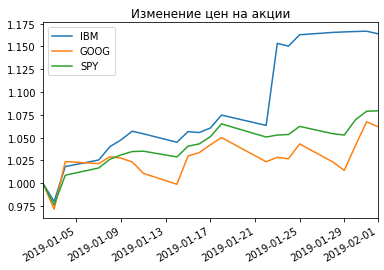

In [79]:
stocks = Stocks(symbols, dates)
stocks.plot_selected(['IBM', 'GOOG', 'SPY'], '2019-01-02', '2019-02-02', relative=True)

In [106]:
portfel.sharpe

AttributeError: 'Portfel' object has no attribute 'sharpe'